<a href="https://colab.research.google.com/github/OsvaldoSan/TSC/blob/master/Practica_Boston_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
data = load_boston()
df_features = pd.DataFrame(data.data,columns=data.feature_names)
df_target = data.target

In [4]:
scaler = StandardScaler()
scaler.fit(df_features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
Xs = pd.DataFrame(scaler.transform(df_features))

In [8]:
scalery = StandardScaler()
scalery.fit(pd.DataFrame(df_target))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
ys = pd.DataFrame(scalery.transform(pd.DataFrame(df_target)),columns=['Price'])

In [11]:
ys.head(2)

,Price
0,0.159686
1,-0.101524


In [14]:
Xst,Xsv,yst,ysv = train_test_split(Xs,ys)

# Construcción del modelo

In [19]:
def build_model():
  model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(Xst.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [20]:
model = build_model()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [22]:
example_batch = Xst[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.01845561],
       [-0.02486682],
       [-0.18575495],
       [ 0.1722045 ],
       [ 0.26392853],
       [-0.19700155],
       [ 0.34231254],
       [ 0.32349303],
       [-0.06835443],
       [ 0.0718005 ]], dtype=float32)

In [29]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  Xst, yst,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [30]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.002962,0.038683,0.002962,0.186073,0.283417,0.186073,995
996,0.002080,0.032675,0.002080,0.176245,0.279563,0.176245,996
997,0.002665,0.039269,0.002665,0.173993,0.275758,0.173993,997
998,0.003116,0.043082,0.003116,0.183268,0.289767,0.183268,998
999,0.001784,0.031602,0.001784,0.180476,0.287295,0.180476,999


In [31]:
loss, mae, mse = model.evaluate(Xsv, ysv, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

4/4 - 0s - loss: 0.1071 - mae: 0.2354 - mse: 0.1071
Testing set Mean Abs Error:  0.24 MPG


In [37]:
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

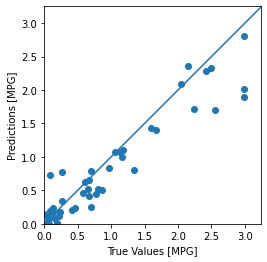

In [39]:
test_predictions = model.predict(Xsv).flatten()

plt.scatter(ysv, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])